In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pref_path = 'modelresults.csv'
df = pd.read_csv(pref_path)
df

,experiment,modelname,twitter,MSE,RMSE,MAE,MAPE
0,typhoon-inflow,STGCN,(w/ twitter),1.567795e+07,3959.539455,1193.719830,12.190367
1,typhoon-inflow,DCRNN,(w/ twitter),1.723750e+07,4151.807416,1222.936171,17.174830
2,typhoon-inflow,GraphWaveNet,(w/ twitter),1.199048e+07,3462.727904,1107.578019,15.105319
3,typhoon-inflow,ASTGCN,(w/ twitter),1.536822e+07,3920.232356,1142.734877,18.092371
4,typhoon-inflow,ASTGCN (Hour),(w/ twitter),1.717791e+07,4144.623646,1374.099464,20.871527
...,...,...,...,...,...,...,...
75,covid-outflow,LSTNet,(w/o twitter),1.842757e+06,1357.481863,518.274158,11.507736
76,covid-outflow,GMAN,(w/o twitter),8.932307e+05,945.108848,408.147763,7.585112
77,covid-outflow,MTGNN,(w/o twitter),1.646585e+06,1283.193361,513.228661,9.995475
78,covid-outflow,AGCRN,(w/o twitter),1.328212e+06,1152.480778,458.372061,9.928685


In [2]:
df_tmp = df[~df.modelname.isin(['LSTNet', 'ASTGCN (Hour)'])]
df_tmp.loc[df_tmp.modelname=='GraphWaveNet', ['modelname']] = 'GW-Net'
df_tmp

/home/boy/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,experiment,modelname,twitter,MSE,RMSE,MAE,MAPE
0,typhoon-inflow,STGCN,(w/ twitter),1.567795e+07,3959.539455,1193.719830,12.190367
1,typhoon-inflow,DCRNN,(w/ twitter),1.723750e+07,4151.807416,1222.936171,17.174830
2,typhoon-inflow,GW-Net,(w/ twitter),1.199048e+07,3462.727904,1107.578019,15.105319
3,typhoon-inflow,ASTGCN,(w/ twitter),1.536822e+07,3920.232356,1142.734877,18.092371
6,typhoon-inflow,GMAN,(w/ twitter),1.576637e+07,3970.688766,1303.292222,16.629262
...,...,...,...,...,...,...,...
73,covid-outflow,ASTGCN,(w/o twitter),1.252632e+06,1119.210435,393.339567,8.320581
76,covid-outflow,GMAN,(w/o twitter),8.932307e+05,945.108848,408.147763,7.585112
77,covid-outflow,MTGNN,(w/o twitter),1.646585e+06,1283.193361,513.228661,9.995475
78,covid-outflow,AGCRN,(w/o twitter),1.328212e+06,1152.480778,458.372061,9.928685


In [3]:
# sns.set_style('darkgrid')
# sns.set_context("paper", rc={"font.size":8,"axes.titlesize":12,"axes.labelsize":10})
# g = sns.catplot(x="modelname", y="MAE", hue='twitter', col="experiment", data=df_tmp, saturation=1.0, kind="bar", aspect=1.2, sharey=False, sharex=False, col_wrap=2, height=4.5, legend=True, legend_out=True)
# g.set_axis_labels("", "MAE").set_titles("{col_name}")
# plt.savefig('withtwitterornot.png')

In [4]:
# sns.set_style('darkgrid')
# sns.set_context("paper", rc={"font.size":8,"axes.titlesize":12,"axes.labelsize":10})
# g = sns.catplot(x="modelname", y="MAE", hue='twitter', col="experiment", data=df_tmp, saturation=1.0, kind="bar", aspect=1.2, sharey=False, sharex=False, height=4.5, legend=True, legend_out=False)
# g.set_axis_labels("", "MAE").set_titles("{col_name}")
# plt.tight_layout()
# plt.savefig('withtwitterornot_v.png')

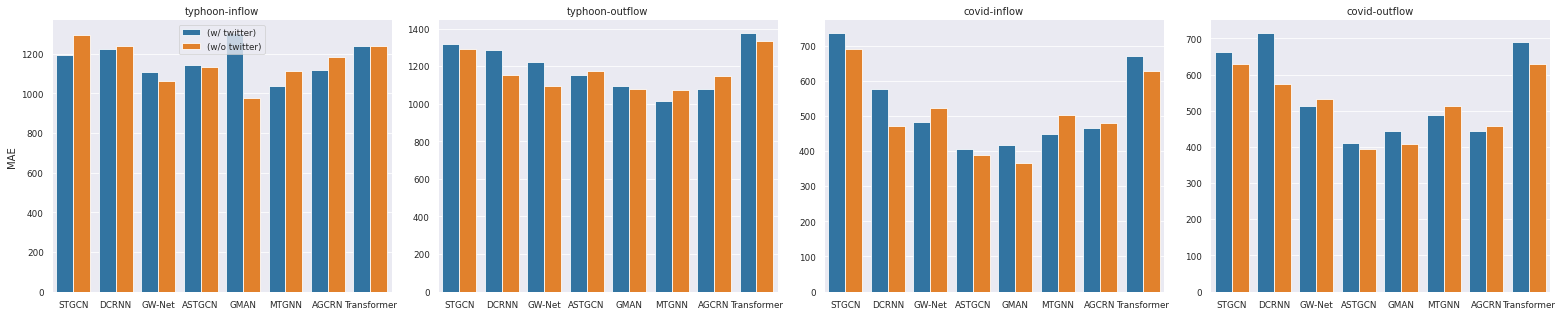

In [38]:
sns.set_style('darkgrid')
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":12,"axes.labelsize":10})
gx = sns.FacetGrid(df_tmp, col='experiment', sharey=False, sharex=False, height=4.5, aspect=1.2, legend_out=False)
gx.map_dataframe(sns.barplot, x='modelname', y="MAE", hue='twitter', palette='tab10')
gx.set_axis_labels("", "MAE").set_titles("{col_name}")
gx.add_legend(title=None)

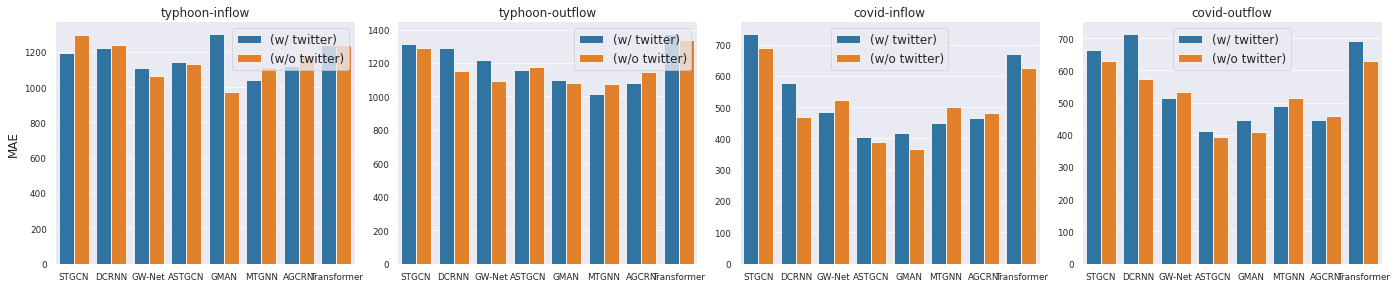

In [117]:
# fianl paper 
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
g = sns.FacetGrid(df_tmp, col='experiment', sharey=False, sharex=False, height=4.0, aspect=1.2)
for col_var, ex_df in df_tmp.groupby(["experiment"]):
    ax = g.axes[0, g.col_names.index(col_var)]
    sns.barplot(x='modelname', y='MAE', hue='twitter', data=ex_df, ax=ax)
    ax.set(xlabel="", ylabel="MAE")
    ax.legend(title=None, fontsize=12)
g.set_axis_labels("", "MAE").set_titles("{col_name}")
# plt.tight_layout()
plt.savefig('withtwitterornot_h.png')

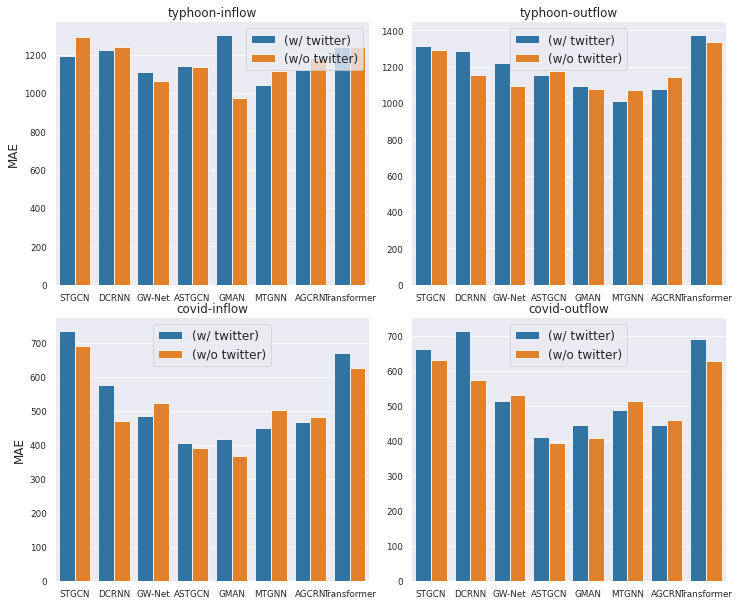

In [118]:
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
g = sns.FacetGrid(df_tmp, col='experiment', sharey=False, sharex=False, height=4.2, aspect=1.2, col_wrap=2)
for col_var, ex_df in df_tmp.groupby(["experiment"]):
    ax = g.axes[g.col_names.index(col_var)]
    sns.barplot(x='modelname', y='MAE', hue='twitter', data=ex_df, ax=ax)
    ax.set(xlabel="", ylabel="MAE")
    ax.legend(title=None, fontsize=12)
g.set_axis_labels("", "MAE").set_titles("{col_name}")
# plt.tight_layout()
plt.savefig('withtwitterornot.png')

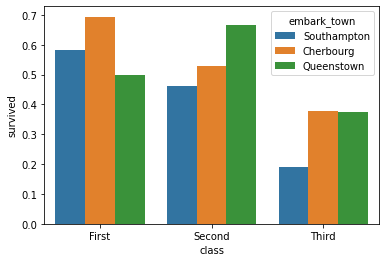

In [6]:
titanic_dataset = sns.load_dataset("titanic")
sns.barplot(x = "class", y = "survived", hue = "embark_town", ci = None, data = titanic_dataset)
plt.show()

<Figure size 1440x1440 with 0 Axes>

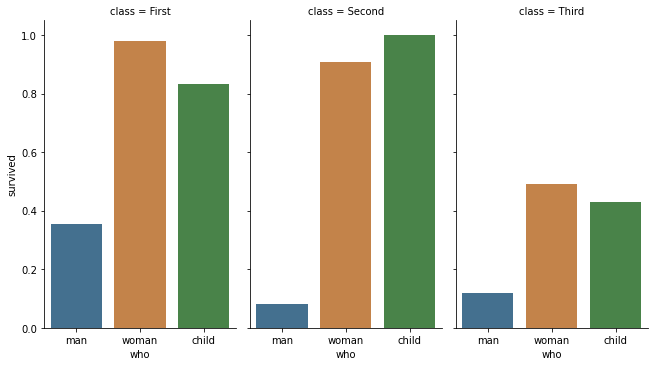

In [7]:
plt.figure(figsize=(20,20))
g = sns.catplot(x="who", y="survived", col="class", data=titanic_dataset, saturation=.5, kind="bar", ci=None, aspect=.6)
plt.show()
# (g.set_axis_labels("", "Survival Rate")
#   .set_xticklabels(["Men", "Women", "Children"])
#   .set_titles("{col_name} {col_var}")
#   .set(ylim=(0, 1))
#   .despine(left=True)) 